# 📊 Customer Churn Prediction  
### By *Vanshika Gupta*

This project applies a structured machine learning workflow to predict telecom customer churn and identify key behavioral drivers.  
The notebook covers data preprocessing, exploratory analysis, handling class imbalance using SMOTE, feature engineering, and building multiple classification models.  
Models are compared using accuracy, recall, F1-score, and ROC-AUC to assess their effectiveness in identifying high-risk customers and supporting data-driven retention strategies.

##### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

##### Load the dataset

In [5]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Exploratory Data Analysis

In [7]:
df.shape

(7043, 21)

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.drop(columns= 'customerID', inplace= True)

In [10]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# check blank space 
(df == ' ').sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
# replace blank space with nan
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [14]:
# count how many blank space
(df['TotalCharges'] == ' ').sum()

0

In [15]:
# change datatype
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [16]:
df['TotalCharges'].isnull().sum()

11

In [17]:
# handle null
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [18]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [19]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df.describe(include= np.number)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


##### Feature Selection

In [23]:
df_cat = df.select_dtypes(include= 'object')
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [24]:
df_num = df.select_dtypes(include= np.number)
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


##### EDA Visuals

Churn Distribution

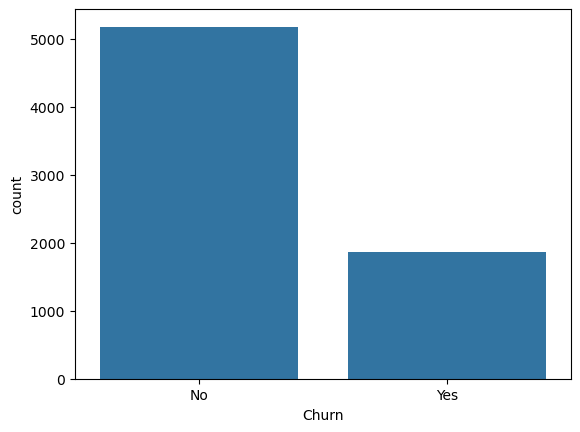

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [27]:
sns.countplot(data=df, x='Churn')
plt.show()

df['Churn'].value_counts(normalize=True)

Numerical Distribution

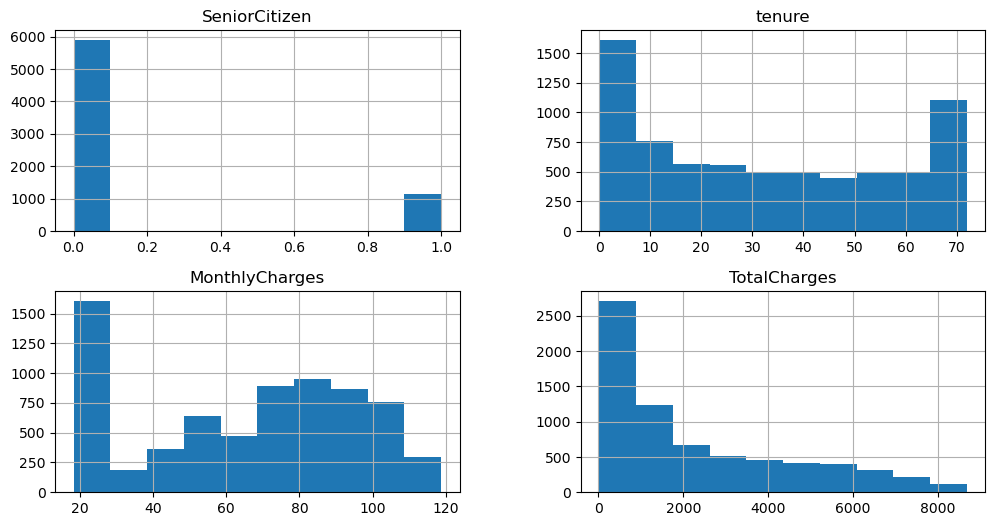

In [29]:
df_num.hist(figsize=(12,6))
plt.show()

Categorical Feature Distribution

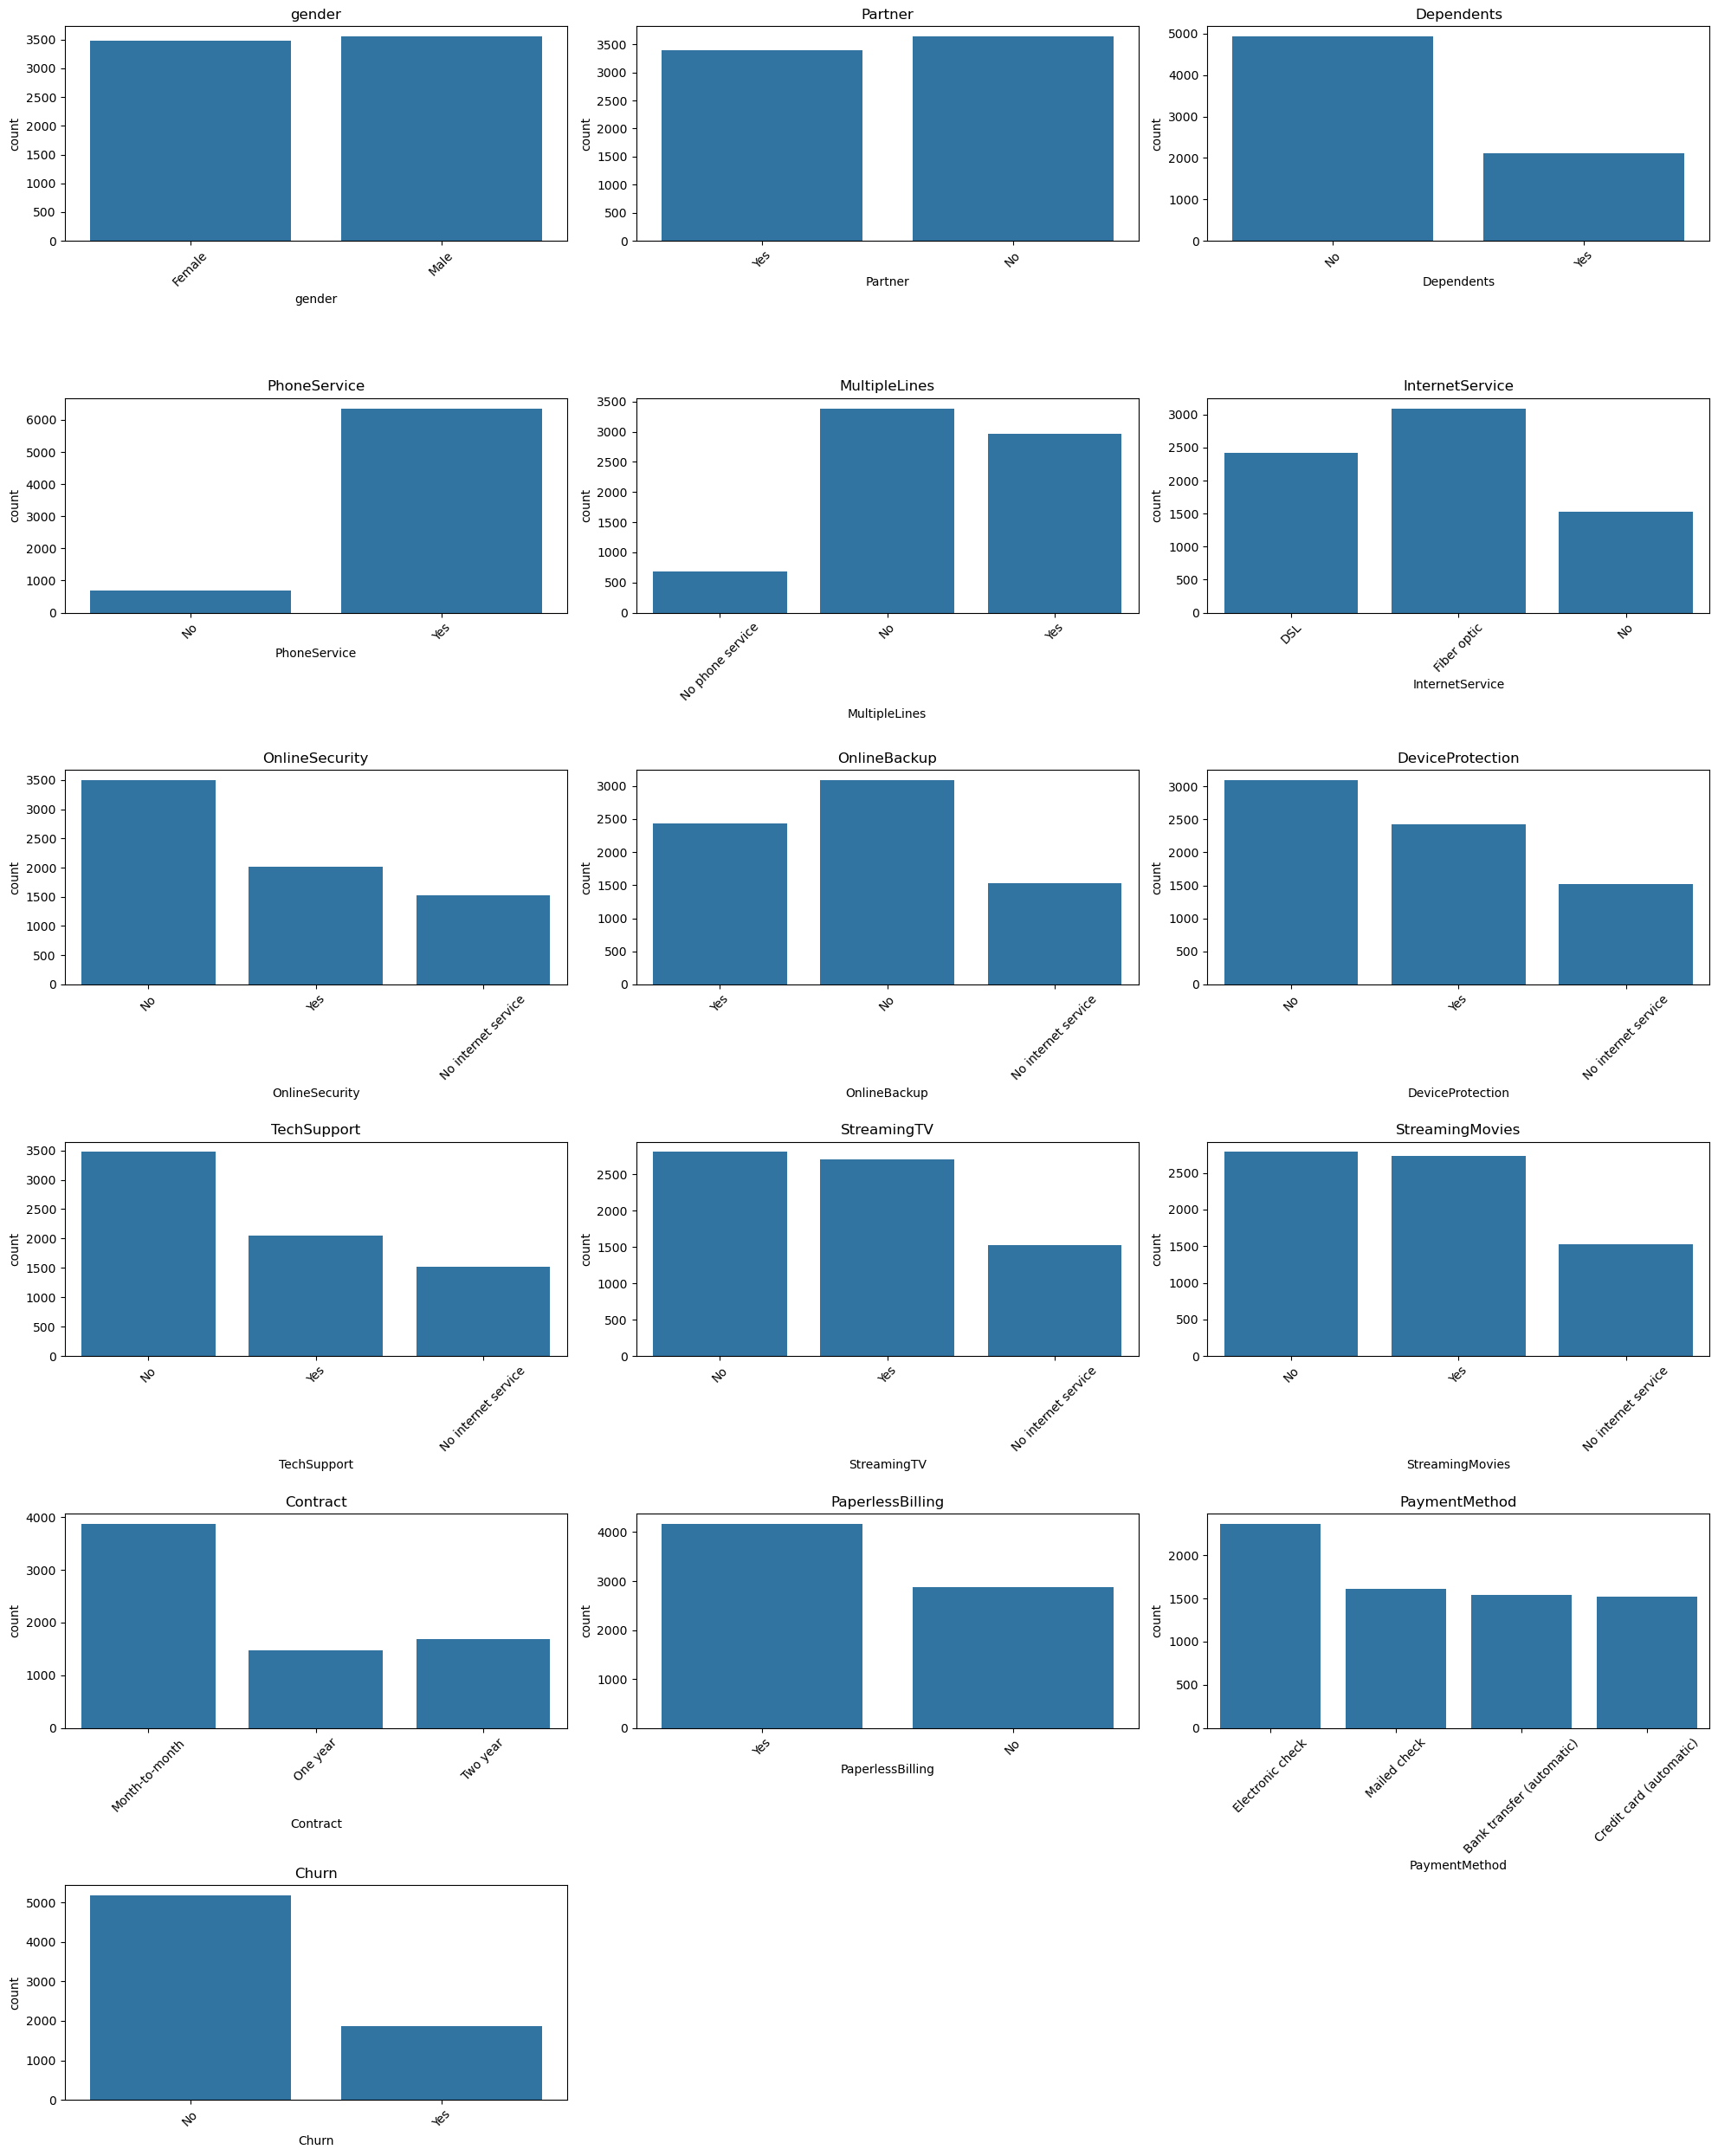

In [31]:
cat_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 25))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols)//3 + 1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Find Outliers

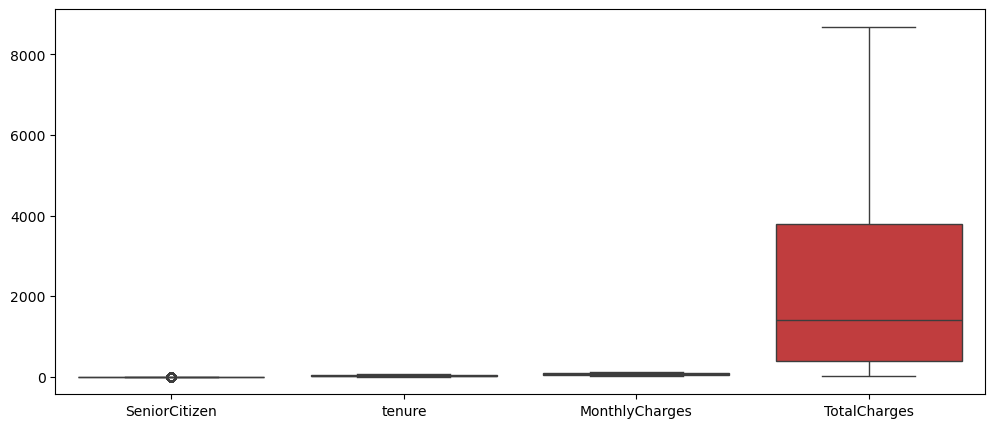

In [33]:
plt.figure(figsize=(12,5))
sns.boxplot(data= df_num)
plt.show()

Check Multicollinearity

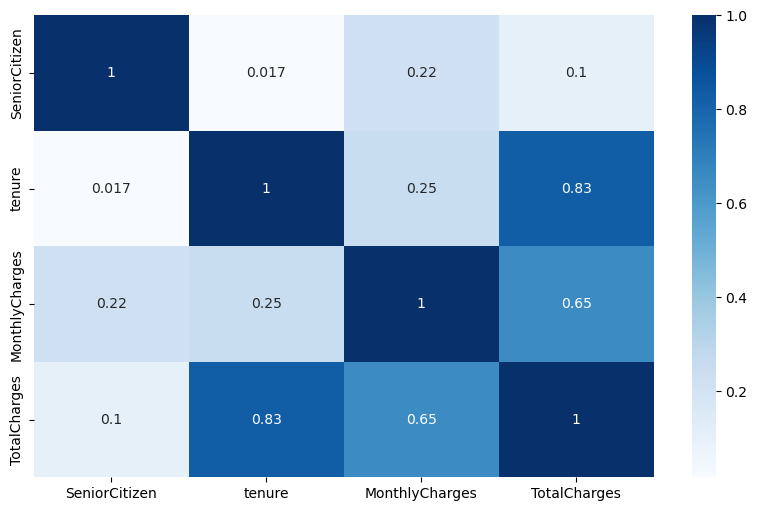

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(), annot=True, cmap='Blues')
plt.show()

A correlation of **0.83** was observed between *tenure* and *TotalCharges*, which is expected since TotalCharges is derived from monthly charges over tenure.  
Tree-based models are not affected by multicollinearity, so no feature was removed. Logistic Regression may show coefficient instability, but overall performance remains unaffected.  
Therefore, the multicollinearity observed is acceptable and does not require feature removal.

## Train Test Split

Separate x and y

In [39]:
x = df.drop(columns= 'Churn')
y = df['Churn'].map({'Yes': 1, 'No': 0})       # Encode y

Encode x

In [41]:
x = pd.get_dummies(x, drop_first=True).astype(int)

train-test split on the encoded data

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state= 42, test_size= 0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 30)
(2113, 30)
(4930,)
(2113,)


##### Check Imbalance

In [45]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

##### Fix Imbalance

In [47]:
smote = SMOTE(random_state=42)

In [48]:
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [49]:
print("Before SMOTE:", x_train.shape, y_train.value_counts())
print("After SMOTE:", x_train_res.shape, y_train_res.value_counts())

Before SMOTE: (4930, 30) Churn
0    3635
1    1295
Name: count, dtype: int64
After SMOTE: (7270, 30) Churn
0    3635
1    3635
Name: count, dtype: int64


##### Feature Scale

In [51]:
scaler = StandardScaler()

x_train_res_scaled = scaler.fit_transform(x_train_res)
x_test_scaled = scaler.transform(x_test)

## Logistic Regression Model

In [53]:
# Train model 
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train_res_scaled, y_train_res)

LogisticRegression(max_iter=1000)

Check Performance of Model

In [55]:
# Predict on TEST data
y_pred = log_model.predict(x_test_scaled)

In [56]:
# Evaluate on TEST data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1539
           1       0.58      0.68      0.62       574

    accuracy                           0.78      2113
   macro avg       0.73      0.75      0.73      2113
weighted avg       0.79      0.78      0.78      2113



In [57]:
# Predict on SMOTE-balanced training data
y_pred_train = log_model.predict(x_train_res_scaled)

In [58]:
# Evaluate on TRAIN (SMOTE) data
print(classification_report(y_train_res, y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      3635
           1       0.83      0.85      0.84      3635

    accuracy                           0.84      7270
   macro avg       0.84      0.84      0.84      7270
weighted avg       0.84      0.84      0.84      7270



Evaluate using Confusion Matrix

<Axes: >

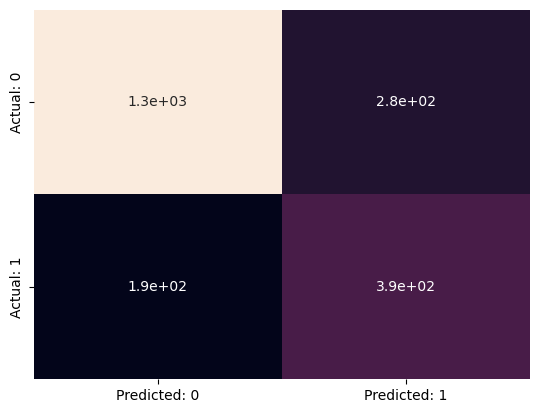

In [60]:
cm = confusion_matrix(y_test, y_pred)
cm2 = pd.DataFrame(data= cm, columns= ['Predicted: 0', 'Predicted: 1'], index= ['Actual: 0', 'Actual: 1'])
sns.heatmap(cm2, annot= True, cbar= False)

In [61]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [62]:
print(f'True Negative: {TN}')
print(f'False Positive: {FP}')
print(f'False Negative: {FN}')
print(f'True Positive: {TP}')

True Negative: 1257
False Positive: 282
False Negative: 186
True Positive: 388


In [63]:
# Test model
y_pred_train = log_model.predict(x_train_res_scaled)

In [64]:
# Evaluate model
print(confusion_matrix(y_train_res, y_pred_train))

[[2995  640]
 [ 558 3077]]


## Decision Tree Model

In [66]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=10, max_features= 8, max_leaf_nodes=12, random_state=42)

In [67]:
dt.fit(x_train_res, y_train_res)

DecisionTreeClassifier(max_depth=10, max_features=8, max_leaf_nodes=12,
                       random_state=42)

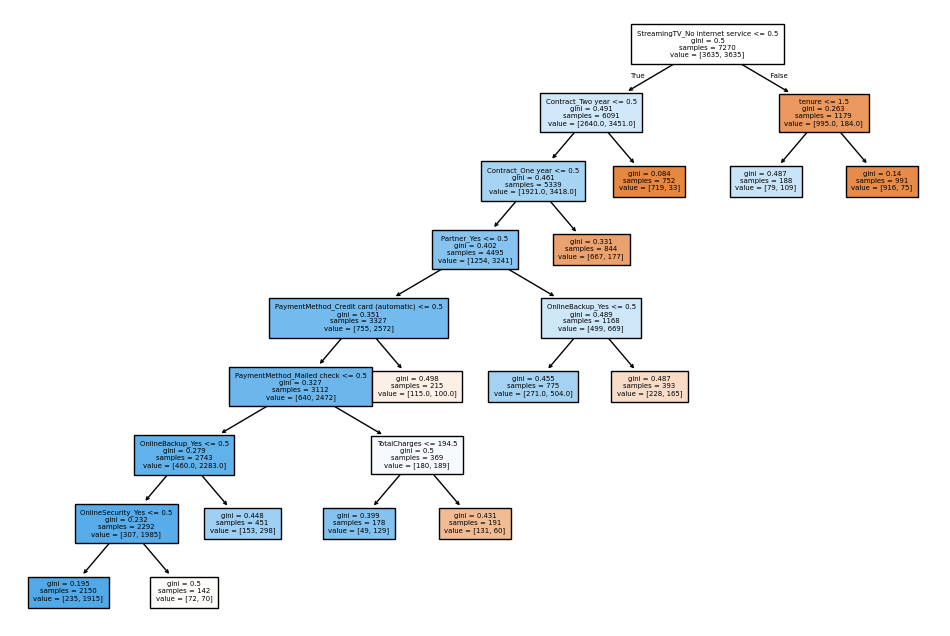

In [68]:
plt.figure(figsize=(12,8))
tree.plot_tree(dt, filled=True, fontsize=5, feature_names= x_train_res.columns)
plt.show()

Check Performance of Model

In [70]:
y_pred_dt= dt.predict(x_test)

In [71]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1539
           1       0.50      0.65      0.57       574

    accuracy                           0.73      2113
   macro avg       0.68      0.70      0.68      2113
weighted avg       0.76      0.73      0.74      2113



In [72]:
y_pred_dt_train = dt.predict(x_train_res)

In [73]:
print(classification_report(y_train_res, y_pred_dt_train))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      3635
           1       0.79      0.81      0.80      3635

    accuracy                           0.80      7270
   macro avg       0.80      0.80      0.80      7270
weighted avg       0.80      0.80      0.80      7270



Over-fitting in Decision Tree

Hyperparameter Tuning (Decision Tree)

In [76]:
# Base Model
dt = DecisionTreeClassifier(random_state=42)

# Parameter Grid 
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_leaf_nodes': [None, 10, 20, 30, 40]
}

# RandomizedSearchCV
dt_random = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=50,         
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the model
dt_random.fit(x_train_res, y_train_res)

# Best parameters
print("Best Parameters:", dt_random.best_params_, "\n")

# Get best model
best_dt = dt_random.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_leaf_nodes': 30, 'max_depth': 6, 'criterion': 'gini'} 



In [77]:
# Test Predictions
y_pred_dt = best_dt.predict(x_test)
print("Decision Tree - Test Report:\n", classification_report(y_test, y_pred_dt))

# Train Predictions
y_pred_dt_train = best_dt.predict(x_train_res)
print("Decision Tree - Train Report:\n", classification_report(y_train_res, y_pred_dt_train))

# Accuracy Summary
print("Train Accuracy:", accuracy_score(y_train_res, y_pred_dt_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree - Test Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.81      1539
           1       0.53      0.72      0.61       574

    accuracy                           0.75      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.78      0.75      0.76      2113

Decision Tree - Train Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      3635
           1       0.80      0.85      0.83      3635

    accuracy                           0.82      7270
   macro avg       0.82      0.82      0.82      7270
weighted avg       0.82      0.82      0.82      7270

Train Accuracy: 0.8188445667125172
Test Accuracy: 0.7477520113582584


## Random Forest Model

In [79]:
rf = RandomForestClassifier(n_estimators=20, random_state=42)

In [80]:
rf.fit(x_train_res, y_train_res)

RandomForestClassifier(n_estimators=20, random_state=42)

Check Performance of Model

In [82]:
y_pred_rf = rf.predict(x_test)

In [83]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1539
           1       0.58      0.58      0.58       574

    accuracy                           0.77      2113
   macro avg       0.71      0.71      0.71      2113
weighted avg       0.77      0.77      0.77      2113



In [84]:
y_pred_rf_train = rf.predict(x_train_res)

In [85]:
print(classification_report(y_train_res, y_pred_rf_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3635
           1       0.99      0.99      0.99      3635

    accuracy                           0.99      7270
   macro avg       0.99      0.99      0.99      7270
weighted avg       0.99      0.99      0.99      7270



##### ROC Curve

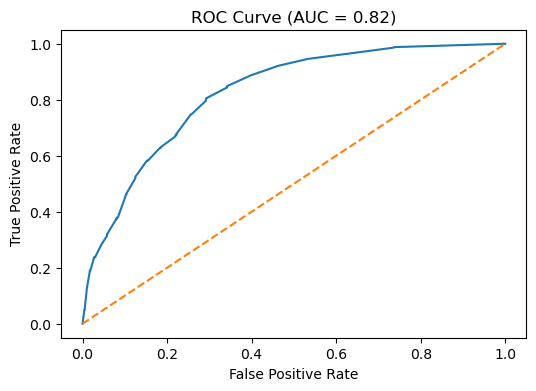

In [87]:
rf_probs = rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

##### Feature Importance of Random Forest

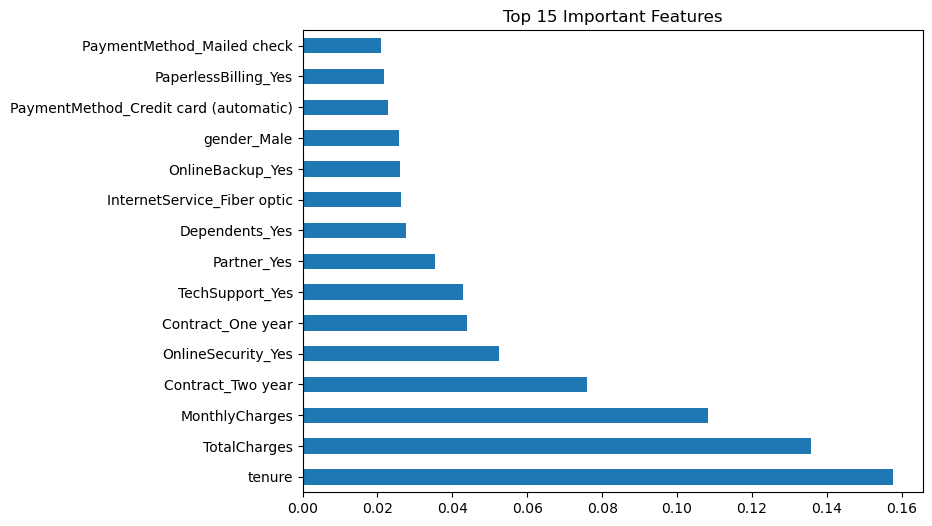

In [89]:
importances = pd.Series(rf.feature_importances_, index= x.columns)
importances.nlargest(15).plot(kind="barh", figsize=(8,6))
plt.title("Top 15 Important Features")
plt.show()

## Gradient Boosting Classifier (sklearn) Model

In [91]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train_res, y_train_res)

y_pred_gb = gb.predict(x_test)

print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1539
           1       0.57      0.71      0.63       574

    accuracy                           0.77      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.79      0.77      0.78      2113



## XGBoost (Extreme Gradient Boosting) Model

In [93]:
xgb = XGBClassifier(
    random_state=42,
    n_estimators=200,    
    learning_rate=0.1,   
    max_depth=5,        
    subsample=0.8,       
    colsample_bytree=0.8
)

xgb.fit(x_train_res, y_train_res)
y_pred_xgb = xgb.predict(x_test)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1539
           1       0.58      0.61      0.60       574

    accuracy                           0.78      2113
   macro avg       0.72      0.73      0.72      2113
weighted avg       0.78      0.78      0.78      2113



## AdaBoost Classifier Model

In [95]:
adb = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
adb.fit(x_train_res, y_train_res)

y_pred_adb = adb.predict(x_test)

print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.94      0.65      0.77      1539
           1       0.49      0.89      0.63       574

    accuracy                           0.72      2113
   macro avg       0.71      0.77      0.70      2113
weighted avg       0.82      0.72      0.73      2113



## Model Comparison Table

In [97]:
models = {
    "Logistic Regression": y_pred,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "XGBoost": y_pred_xgb,
    "AdaBoost": y_pred_adb
}

# Probability predictions for ROC-AUC 
probs = {
    "Logistic Regression": log_model.predict_proba(x_test_scaled)[:,1],
    "Decision Tree": best_dt.predict_proba(x_test)[:,1],
    "Random Forest": rf.predict_proba(x_test)[:,1],
    "Gradient Boosting": gb.predict_proba(x_test)[:,1],
    "XGBoost": xgb.predict_proba(x_test)[:,1],
    "AdaBoost": adb.predict_proba(x_test)[:,1]
}

# Create comparison table
comparison = []

for model_name in models:
    y_pred = models[model_name]
    y_prob = probs[model_name]
    
    comparison.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Class=1)": precision_score(y_test, y_pred),
        "Recall (Class=1)": recall_score(y_test, y_pred),
        "F1-Score (Class=1)": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

comparison_df = pd.DataFrame(comparison)
comparison_df

,Model,Accuracy,Precision (Class=1),Recall (Class=1),F1-Score (Class=1),ROC-AUC
0,Logistic Regression,0.778514,0.579104,0.675958,0.623794,0.842327
1,Decision Tree,0.747752,0.526115,0.719512,0.607800,0.809703
2,Random Forest,0.773781,0.583624,0.583624,0.583624,0.823552
3,Gradient Boosting,0.773308,0.566434,0.705575,0.628394,0.841869
4,XGBoost,0.776148,0.583471,0.614983,0.598813,0.830699
5,AdaBoost,0.715570,0.487081,0.886760,0.628783,0.841773


### 📌 Model Selection Summary

Based on the comparison of Accuracy, Recall, F1-Score, and ROC-AUC:

- **Gradient Boosting** provided the best *overall balanced performance* with strong recall, F1-score, and high AUC.
- **AdaBoost** achieved the *highest recall (0.88)*, making it ideal when the business priority is to catch as many churn customers as possible.
- **Logistic Regression** performed consistently well with high AUC and remains the most interpretablmodel.

 Therefore, **Gradient Boosting** is selected as the final model for a balanced and reliable churn prediction use case.


##### Predict on Unseen Data

In [100]:
new_customer = pd.DataFrame({
    "tenure":[5],
    "MonthlyCharges":[70],
    "TotalCharges":[350],
    "Contract_Month-to-month":[1],
    "InternetService_Fiber optic":[1],
    "OnlineSecurity_No":[1],
    # rest columns default 0
}, index=[0])

new_customer = new_customer.reindex(columns= x.columns, fill_value=0)
new_pred = rf.predict(new_customer)
new_pred

array([1], dtype=int64)

##### Final preview of the processed dataset

In [102]:
print("Final Feature Matrix Shape:", x.shape)
x.head()

Final Feature Matrix Shape: (7043, 30)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56,1889,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53,108,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42,1840,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70,151,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


# 📌 Business Insights

Based on feature importance, model outputs, and EDA, the following key business drivers of churn were identified:

### **1. Contract Type**
Customers on **Month-to-Month** contracts churn significantly more than those with 1 or 2 Year contracts.
- Retention opportunity: Offer discounts or upgrade incentives for longer-term contracts.

### **2. Internet Service**
Customers using **Fiber Optic** internet show the highest churn.
- Possible reasons: higher charges, service issues, expectations mismatch.
- Recommendation: Improve fiber service quality or offer loyalty benefits.

### **3. Lack of Security & Tech Support Services**
Customers without:
- **Online Security**
- **Tech Support**
- **Device Protection**
  
are more likely to leave.

Offering bundled security + support plans can reduce churn.

### **4. High Monthly Charges**
Higher monthly charges correlate strongly with churn.
- Offer custom plans, flexible billing, or discount vouchers for at-risk high-billing users.

### **5. Tenure (New Customers)**
Customers with **lower tenure (< 6 months)** churn the most.
- Recommendation: Focus on onboarding quality, early engagement campaigns, welcome offers.

### **6. Payment Method**
Customers paying via **Electronic Check** have the highest churn rate.
- Suggest switching to autopay, credit card, or secure payment modes with cashback/discounts.


These insights can directly help the business strengthen retention strategies, reduce revenue loss, and improve customer satisfaction.

# ✅ Conclusion

This machine learning project successfully built a complete churn prediction pipeline—from data cleaning and EDA to model development, tuning, and business interpretation.

### ✔ Key Outcomes
- The dataset was highly imbalanced (Only ~26% churn), and **SMOTE** was effectively used to balance the training set.
- Multiple ML models were trained and evaluated. Among them:
  - **Gradient Boosting** delivered the best balanced performance.
  - **Logistic Regression** and **XGBoost** performed consistently well.
  - **Tuned Decision Tree** achieved strong recall for identifying churn customers.
  - **AdaBoost** produced the highest recall (≈ 89%), making it valuable when catching churners is the priority.
- Feature importance analysis revealed that **contract type**, **monthly charges**, **fiber optic service**, **security services**, and **tenure** are the strongest churn indicators.

### ✔ Business Value
The company can now:
- Identify high-risk customers before they leave.
- Implement targeted offers for month-to-month contract users.
- Improve fiber-optic quality and technical support.
- Reduce churn among new customers through onboarding programs.

Overall, the churn prediction model provides actionable insights that can significantly improve **customer retention**, **revenue stability**, and **overall business performance**.